This notebook contains all code and outputs for Homework 1. While some brief explanations may be included alongside the code, all formal written responses and detailed interpretations are provided in the accompanying PDF file. Please refer to the PDF for complete answers to questions, reasoning behind analytical steps, and interpretation of results. The notebook is divided into clearly labeled tasks (Task 0–Task 5), each with relevant sub-tasks and explanations

# Task 0: Importing the aircraft inventory dataset

The aircraft inventory dataset can easily be imported using the following commands. I store all my Northwestern data on Google Drive, this makes it quite easy to work with Colab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox

In [2]:
import pandas as pd
inventory = pd.read_csv('/content/drive/MyDrive/Northwestern Data/Sophomore/Spring/DATA300/Homework/Homework1_AircraftInventoryAnalysis/T_F41SCHEDULE_B43.zip')

<ipython-input-2-08df76c23aae>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('/content/drive/MyDrive/Northwestern Data/Sophomore/Spring/DATA300/Homework/Homework1_AircraftInventoryAnalysis/T_F41SCHEDULE_B43.zip')


In [3]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

Based off the summary of the dataset, we can see that some columns have lots of null entries, this is useful to know for the assigment.

# Task 1: Investigating missing data in the dataset.

I first want to check if there are any duplicate rows within the dataset:

In [4]:
sum(inventory.duplicated())

0

There are not any duplicate rows within the dataset.

In [5]:
inventory.isnull().sum()

,0
YEAR,0
CARRIER,49
CARRIER_NAME,105
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,105
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,7


##Investigating CARRIER

In [6]:
inventory.loc[(inventory['CARRIER'].isnull()) | (inventory['CARRIER'] == '')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NaN,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
11777,2007,NaN,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
11778,2007,NaN,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NaN
11779,2007,NaN,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
11780,2007,NaN,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
11781,2007,NaN,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
11782,2007,NaN,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
11783,2007,NaN,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
11784,2007,NaN,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
11785,2007,NaN,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


Ahah. This is very interesting. When I investigate the CARRIER column for missing data, the only carrier which has missing data is North American Airlines. All the rows with missing values in the CARRIER column had “North American Airlines” listed in the CARRIER_NAME column. It makes sense that python is interpreting these as missing because the carrier code assigned to North American Airlines by IATA is NA.

In order to fix this, I will assign code NA to CARRIER column for all rows which have CARRIER_NAME as North American Airlines

In [7]:
inventory.loc[inventory['CARRIER_NAME'] == 'North American Airlines', 'CARRIER'] = 'NA'
inventory.loc[inventory['CARRIER_NAME'] == 'North American Airlines', 'UNIQUE_CARRIER'] = 'NA'

##Investigating CARRIER_NAME

In [8]:
inventory.loc[inventory['CARRIER_NAME'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,NaN,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,NaN,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,NaN,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,NaN,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


In [9]:
inventory[inventory['CARRIER'] == 'OH']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
4896,2006,OH,Comair Inc.,1993.0,Comair Inc.,7011,N912CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,4/29/1993 12:00:00 AM,20417.0,OH
4897,2006,OH,Comair Inc.,1993.0,Comair Inc.,7012,N914CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,4/29/1993 12:00:00 AM,20417.0,OH
4898,2006,OH,Comair Inc.,1993.0,Comair Inc.,7013,N915CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,6/25/1993 12:00:00 AM,20417.0,OH
4899,2006,OH,Comair Inc.,1993.0,Comair Inc.,7014,N916CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,6/3/1993 12:00:00 AM,20417.0,OH
4900,2006,OH,Comair Inc.,1993.0,Comair Inc.,7017,N917CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,7/29/1993 12:00:00 AM,20417.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129269,2023,OH,PSA Airlines Inc.,2019.0,PSA Airlines Inc.,15476,N610NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,11/21/2019 12:00:00 AM,20397.0,OH
129270,2023,OH,PSA Airlines Inc.,2019.0,PSA Airlines Inc.,15477,N612NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,12/5/2019 12:00:00 AM,20397.0,OH
129271,2023,OH,PSA Airlines Inc.,2020.0,PSA Airlines Inc.,15481,N613NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,2/20/2020 12:00:00 AM,20397.0,OH
129272,2023,OH,PSA Airlines Inc.,2020.0,PSA Airlines Inc.,15483,N614NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,3/12/2020 12:00:00 AM,20397.0,OH


After doing research online I determine determined that the rows with carrier OH but missing carrier name were planes operated by PSA Airlines. So I will assign the rows values from PSA Airlines.

In [10]:
inventory.loc[inventory['CARRIER_NAME'].isnull() & (inventory['CARRIER'] == 'OH'), 'CARRIER_NAME'] = 'PSA Airlines Inc.'
inventory.loc[inventory['CARRIER_NAME'].isnull() & (inventory['CARRIER'] == 'OH'), 'UNIQUE_CARRIER_NAME'] = 'PSA Airlines Inc.'
inventory.loc[inventory['CARRIER_NAME'].isnull() & (inventory['CARRIER'] == 'OH'), 'AIRLINE_ID'] = '20397.0'
inventory.loc[inventory['CARRIER_NAME'].isnull() & (inventory['CARRIER'] == 'OH'), 'UNIQUE_CARRIER'] = 'OH'




<ipython-input-10-d73daf07251e>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20397.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inventory.loc[inventory['CARRIER_NAME'].isnull() & (inventory['CARRIER'] == 'OH'), 'AIRLINE_ID'] = '20397.0'


Upon further inspection, it appears that the rows with missing carrier names have either L4 or OH listed under the CARRIER column. The code L4 corresponds to Lynx Aviation d/b/a Frontier Airlines, which has a CARRIER_ID of 21217.0 and a UNIQUE_CARRIER of L3. I will assign the missing carrier names to match the values used in the other rows.

In [11]:
inventory.loc[inventory['CARRIER'] == 'L4', 'CARRIER_NAME'] = 'Lynx Aviation d/b/a Frontier Airlines'
inventory.loc[inventory['CARRIER'] == 'L4', 'UNIQUE_CARRIER_NAME'] = 'Lynx Aviation d/b/a Frontier Airlines'
inventory.loc[inventory['CARRIER'] == 'L4', 'UNIQUE_CARRIER'] = 'L3'
inventory.loc[inventory['CARRIER'] == 'L4', 'AIRLINE_ID'] = 21217.0


##Investigating Manufacture Year

Before investigativng manufacture year, we should set rows which have 0 for the manufacture year to 0, as this does not make sense.

In [12]:
inventory['MANUFACTURE_YEAR'] = inventory['MANUFACTURE_YEAR'].replace(0, np.nan)

In [13]:
inventory[inventory['MANUFACTURE_YEAR'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
32460,2010,FX,Federal Express Corporation,NaN,Federal Express Corporation,0,N10061,O,Y,0.0,MCDONNELLDOUGLAS,7302.0,DC10-10,0.0,12/6/1990 12:00:00 AM,20107.0,FX
32461,2010,FX,Federal Express Corporation,NaN,Federal Express Corporation,0,N10062,O,Y,0.0,MCDONNELLDOUGLAS,7303.0,DC10-30,0.0,3/8/1990 12:00:00 AM,20107.0,FX
32462,2010,FX,Federal Express Corporation,NaN,Federal Express Corporation,0,N858FD,O,Y,0.0,BOEING,6222.0,727-200,0.0,8/30/2010 12:00:00 AM,20107.0,FX
32463,2010,FX,Federal Express Corporation,NaN,Federal Express Corporation,0,N859FD,O,Y,0.0,BOEING,6222.0,757-200,0.0,2/1/2007 12:00:00 AM,20107.0,FX
58987,2014,DL,Delta Air Lines Inc.,NaN,Delta Air Lines Inc.,53534,N302EV,O,N,160.0,McDonnelDouglas,6561,MD-90-PSGR,29550.0,8/6/2014 12:00:00 AM,19790.0,DL
58988,2014,DL,Delta Air Lines Inc.,NaN,Delta Air Lines Inc.,53537,N304EV,O,N,160.0,McDonnelDouglas,6561,MD-90-PSGR,29550.0,11/17/2014 12:00:00 AM,19790.0,DL
58989,2014,DL,Delta Air Lines Inc.,NaN,Delta Air Lines Inc.,53554,N303EV,O,N,160.0,McDonnelDouglas,6561,MD-90-PSGR,29550.0,10/17/2014 12:00:00 AM,19790.0,DL
58990,2014,DL,Delta Air Lines Inc.,NaN,Delta Air Lines Inc.,53601,N305EV,O,N,160.0,McDonnelDouglas,6561,MD-90-PSGR,29550.0,12/11/2014 12:00:00 AM,19790.0,DL
66436,2015,DL,Delta Air Lines Inc.,NaN,Delta Air Lines Inc.,24810,N513UA,O,N,0.0,BOEINGCOMPANY,6221,757-232-PSGR,51468.0,11/23/2015 12:00:00 AM,19790.0,DL
66437,2015,DL,Delta Air Lines Inc.,NaN,Delta Air Lines Inc.,53534,N302EV,O,N,160.0,McDonnellDouglas,6561,MD-90-PSGR,29550.0,8/6/2014 12:00:00 AM,19790.0,DL


Some aircraft in the dataset have missing or zero values in the MANUFACTURE_YEAR column. Since a manufacturing year of 0 is not valid, I first replaced all zero values with NaN to treat them consistently as missing data.

To fill in these missing values, I grouped the dataset by the MODEL column and imputed the missing MANUFACTURE_YEAR values using the median year for each respective aircraft model. This approach ensures that the imputed year is based on similar aircraft and is not skewed by outliers, as might occur if using the mean.

**This imputation step is most effective after cleaning and standardizing the MODEL column, since inconsistent or overly specific model names (e.g., B737-8JP vs. B737) can prevent accurate grouping and reduce the effectiveness of the median calculation. Therefore, it is run later in the notebook after model is cleaned**

##Investigating Number Of Seats

In [14]:
inventory[inventory['NUMBER_OF_SEATS'].isnull() | inventory['NUMBER_OF_SEATS'].astype(str).str.strip().eq('')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


In [15]:
inventory[inventory['CARRIER_NAME'].str.contains('fed', case=False, na=False)]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
3156,2006,FX,Federal Express Corporation,1965.0,Federal Express Corporation,18863,N166FE,O,Y,0.0,BOEING,NaN,B727-1,36126.0,5/1/1990 12:00:00 AM,20107.0,FX
3157,2006,FX,Federal Express Corporation,1966.0,Federal Express Corporation,18865,N168FE,O,Y,0.0,BOEING,NaN,B727-1,36943.0,12/7/1988 12:00:00 AM,20107.0,FX
3158,2006,FX,Federal Express Corporation,1966.0,Federal Express Corporation,18871,N185FE,O,Y,0.0,BOEING,NaN,B727-1,36660.0,6/8/1989 12:00:00 AM,20107.0,FX
3159,2006,FX,Federal Express Corporation,1966.0,Federal Express Corporation,18872,N186FE,O,Y,0.0,BOEING,NaN,B727-1,36787.0,8/24/1989 12:00:00 AM,20107.0,FX
3160,2006,FX,Federal Express Corporation,1966.0,Federal Express Corporation,19081,N188FE,O,Y,0.0,BOEING,NaN,B727-1,36014.0,12/13/1989 12:00:00 AM,20107.0,FX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128321,2023,FX,Federal Express Corporation,2023.0,Federal Express Corporation,66866,N267FE,O,Y,0.0,Boeing,6262,767-300F,127384.0,6/13/2023 12:00:00 AM,20107.0,FX
128322,2023,FX,Federal Express Corporation,2023.0,Federal Express Corporation,67530,N263FE,O,Y,0.0,Boeing,6262,767-300F,127384.0,10/6/2023 12:00:00 AM,20107.0,FX
128323,2023,FX,Federal Express Corporation,2023.0,Federal Express Corporation,67531,N262FE,O,Y,0.0,Boeing,6262,767-300F,127384.0,10/10/2023 12:00:00 AM,20107.0,FX
128324,2023,FX,Federal Express Corporation,2023.0,Federal Express Corporation,67532,N261FE,O,Y,0.0,Boeing,6262,767-300F,127384.0,10/27/2023 12:00:00 AM,20107.0,FX


Looking at the rows which have missing values for Number of Seats, we can see that they are all cargo planes. This is seen in the model column. They are all 767 cargo jets. Cargo jets do not have seats (only 4 for pilots), as they transport cargo not humans. Given this, I will set the number of seats to 0 for these rows, consisent with other rows which are cargo (FedEx)

In [16]:
inventory.loc[inventory['MODEL'].str.contains(r'767-.*CARGO', case=False, na=False),'NUMBER_OF_SEATS'] = 0

Confirming that this worked:

In [17]:
inventory[inventory['NUMBER_OF_SEATS'].isnull() | inventory['NUMBER_OF_SEATS'].astype(str).str.strip().eq('')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER


In [18]:
inventory[inventory['NUMBER_OF_SEATS'] == 0]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
49,2006,3Z,Tatonduk Flying Service,1944.0,Tatonduk Flying Service,22451,N23ACC,O,N,0.0,CURTISS,NaN,COMMANDO,14000.0,8/1/2021 12:00:00 AM,20408.0,3Z
51,2006,3Z,Tatonduk Flying Service,1945.0,Tatonduk Flying Service,33285,N54514,O,Y,0.0,CURTISS,NaN,COMMANDO,14000.0,5/1/1996 12:00:00 AM,20408.0,3Z
52,2006,3Z,Tatonduk Flying Service,1954.0,Tatonduk Flying Service,44258,N400UA,B,Y,0.0,MCDONNELL-DOUGLAS,NaN,DC-6A,28000.0,6/1/2004 12:00:00 AM,20408.0,3Z
53,2006,3Z,Tatonduk Flying Service,1954.0,Tatonduk Flying Service,44599,N351CE,O,Y,0.0,MCDONNELL-DOUGLAS,NaN,DC-6A,28000.0,7/1/1995 12:00:00 AM,20408.0,3Z
54,2006,3Z,Tatonduk Flying Service,1954.0,Tatonduk Flying Service,44612,N251CE,O,Y,0.0,MCDONNELL-DOUGLAS,NaN,DC-6A,28000.0,5/1/1996 12:00:00 AM,20408.0,3Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132006,2023,YV,Mesa Airlines Inc.,2023.0,Mesa Airlines Inc.,1156AT912LSA,N487LP,O,Y,0.0,PIPISTRELDOO,4511,PIPISTRELALPHATRAINE,500.0,8/18/2023 12:00:00 AM,20378.0,YV
132007,2023,YV,Mesa Airlines Inc.,2023.0,Mesa Airlines Inc.,1157AT912LSA,N490LP,O,Y,0.0,PIPISTRELDOO,4511,PIPISTRELALPHATRAINE,500.0,8/11/2023 12:00:00 AM,20378.0,YV
132008,2023,YV,Mesa Airlines Inc.,2023.0,Mesa Airlines Inc.,1158AT912LSA,N491LP,O,Y,0.0,PIPISTRELDOO,4511,PIPISTRELALPHATRAINE,500.0,8/18/2023 12:00:00 AM,20378.0,YV
132009,2023,YV,Mesa Airlines Inc.,2023.0,Mesa Airlines Inc.,1159AT912LSA,N492LP,O,Y,0.0,PIPISTRELDOO,4511,PIPISTRELALPHATRAINE,500.0,8/10/2023 12:00:00 AM,20378.0,YV


##Investigating Capacity of Airplane in Pounds

In [19]:
inventory['CAPACITY_IN_POUNDS'] = inventory['CAPACITY_IN_POUNDS'].replace(0, np.nan)

In [20]:
inventory[inventory['CAPACITY_IN_POUNDS'].isnull() | inventory['CAPACITY_IN_POUNDS'].astype(str).str.strip().eq('')]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
17773,2008,F9,Frontier Airlines Inc.,2008.0,Frontier Airlines Inc.,3389,N201FR,O,Y,162.0,AIRBUS,NaN,A320-1/2,NaN,2/7/2008 12:00:00 AM,20436.0,F9
17774,2008,F9,Frontier Airlines Inc.,2008.0,Frontier Airlines Inc.,3431,N202FR,O,Y,162.0,AIRBUS,NaN,A320-1/2,NaN,3/9/2008 12:00:00 AM,20436.0,F9
22121,2009,0JQ,Vision Airlines,1985.0,Vision Airlines,8044,N407VA,B,N,30.0,DORNIER ...,NaN,DO-228,NaN,12/1/2003 12:00:00 AM,21236.0,0JQ
22122,2009,0JQ,Vision Airlines,1985.0,Vision Airlines,8045,N408VA,B,N,19.0,DORNIER ...,NaN,DO-228,NaN,12/1/2003 12:00:00 AM,21236.0,0JQ
22125,2009,0JQ,Vision Airlines,1987.0,Vision Airlines,8110,N501VA,B,N,19.0,DORNIER ...,NaN,DO-228,NaN,4/1/2004 12:00:00 AM,21236.0,0JQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128876,2023,MQ,Envoy Air,2022.0,Envoy Air,17000931,N303DD,b,Y,65.0,Embraer,6731,ERJ170-200LR,NaN,12/29/2022 12:00:00 AM,20398.0,MQ
128877,2023,MQ,Envoy Air,2022.0,Envoy Air,17000932,N304KM,b,Y,65.0,Embraer,6731,ERJ170-200LR,NaN,12/29/2022 12:00:00 AM,20398.0,MQ
128878,2023,MQ,Envoy Air,2022.0,Envoy Air,17000934,N305CL,b,Y,65.0,Embraer,6731,ERJ170-200LR,NaN,12/29/2022 12:00:00 AM,20398.0,MQ
128879,2023,MQ,Envoy Air,2023.0,Envoy Air,17000958,N311VE,b,Y,65.0,Embraer,6731,ERJ170-200LR,NaN,12/15/2023 12:00:00 AM,20398.0,MQ


Some aircraft in the dataset have a CAPACITY_IN_POUNDS value of 0, which is not realistic. To address this, I identified rows with zero capacity or missing values and, for each one, located other rows with the same MODEL. I then used the median capacity from those matching rows to impute a more reasonable value.

However, some entries still remained with zero capacity. These correspond to aircraft with unique or uncommon model names that do not have other entries in the dataset with a valid (non-zero) capacity to reference. These cases may require manual review or external data sources to resolve.

**This imputation step is most effective after cleaning and standardizing the MODEL column, since inconsistent or overly specific model names (e.g., B737-8JP vs. B737) can prevent accurate grouping and reduce the effectiveness of the median calculation. Therefore, it is run later in the notebook after model is cleaned**

In [21]:
inventory.loc[inventory['CAPACITY_IN_POUNDS'] == 0, 'MODEL'].unique()

array([], dtype=object)

In [22]:
inventory.loc[inventory['CAPACITY_IN_POUNDS'] == np.nan, 'MODEL']

,MODEL


##Investigating AIRLINE_ID

In [23]:
inventory.loc[(inventory['AIRLINE_ID'].isnull() | inventory['AIRLINE_ID'].astype(str).str.strip().eq('')),'CARRIER_NAME'].unique()

array(['PSA Airlines Inc.'], dtype=object)

Because the only rows with missing AIRLINE_ID are the oens which are PSA Airlines, we can search for PSA Airlines AIRLINE_ID in other rows and copy to missing row.

In [24]:
inventory.loc[inventory['CARRIER_NAME'] == 'PSA Airlines Inc.','AIRLINE_ID'].unique()

array([20397.0, nan], dtype=object)

In [25]:
inventory.loc[(inventory['AIRLINE_ID'].isnull()) & (inventory['CARRIER_NAME'] == 'PSA Airlines Inc.'),'AIRLINE_ID'] = 20397.0

# Task 2: Transformation/Standardization Investigation

## Investigating Manufacturer Column

In [26]:
inventory['MANUFACTURER'].unique().size

183

In [27]:
inventory['MANUFACTURER'] = inventory['MANUFACTURER'].str.lower().str.strip()

McDonnel-douglas is a big one that needs to be cleaned up. examples include

In [28]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'mcdonnel|douglas|mcdo'),'MANUFACTURER'].unique()

array(['mcdonnell-douglas', 'douglas', 'mcdonnelldouglas',
       'mcdonnelldoug', 'douglasaircraft', 'mcdonneldouglas',
       'mcdonalddouglas', 'mddouglas', 'mcdonnelldouglasmd11-f',
       'mcdonnel', 'mcdonnell', 'mcdo', 'boeing(mcdonnell-douglas)'],
      dtype=object)

In [29]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'mcdonnel|douglas|mcdo'),'MANUFACTURER'] = 'mcdonnel-dogulas'

Boeing is another big name that needs to be cleaned up. Examples include:

In [30]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'boeing'),'MANUFACTURER'].unique()

array(['boeing', 'theboeingcompany', 'boeingco', 'boeingcompany',
       'theboeingco', 'boeing747-446', 'boeingco.'], dtype=object)

In [31]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'boeing'),'MANUFACTURER'] = 'boeing'

Airbus is another big name that needs to be cleaned up. Examples include:

In [32]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'airbus'),'MANUFACTURER'].unique()

array(['airbus', 'airbusindustries', 'airbusindustrie', 'airbuscompany',
       'airblue/airbus'], dtype=object)

In [33]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'airbus'),'MANUFACTURER'] = 'airbus'

Fokker is another big name that needs to be cleand up. Examples include:

In [34]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'fokker'),'MANUFACTURER'].unique()

array(['fokker', 'fokkeraircraftusa', 'fokker72', 'fokker70', 'fokker71'],
      dtype=object)

In [35]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'fokker'),'MANUFACTURER'] = 'fokker'

Doing the rest: (dont want to be repetitive)

In [36]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'gulfstream'),'MANUFACTURER'] = 'gulfstream'

In [37]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'lear'),'MANUFACTURER'] = 'learjet'

In [38]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'saab'),'MANUFACTURER'] = 'saab'

In [39]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'b757-223'),'MANUFACTURER'] = 'boeing'

In [40]:
inventory.loc[inventory['MANUFACTURER'].str.contains(r'beech'),'MANUFACTURER'] = 'beechcraft'

## Investigating MODEL

In [41]:
inventory['MODEL'] = inventory['MODEL'].str.upper().str.strip()

In [42]:
inventory['MODEL'].unique().size

1269

In [43]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^BOEINGB', 'B', regex=True)

In [44]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^BOEING', 'B', regex=True)

In [45]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'\bB-', 'B', regex=True)

In [46]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'AIRBUS', 'A', regex=True)

In [47]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^A-', '', regex=True)

In [48]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'EMB-', '', regex=True)

In [49]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'(?<!B)(?=\b(737|727|747|757|767|777|787))', 'B', regex=True)
inventory['MODEL'] = inventory['MODEL'].str.replace(r'(?<!A)(?=\b(300|310|318|319|320|321|330|340|350|380))', 'A', regex=True)
inventory['MODEL'] = inventory['MODEL'].str.replace(r'(?<!E)(?=\b(120|135|140|145|170|175|190|195))', 'E', regex=True)

In [50]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^(B\d{3}).*', r'\1', regex=True)

In [51]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^(A\d{3}).*', r'\1', regex=True)

In [52]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^(CRJ\d{3}).*', r'\1', regex=True)

In [53]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'-(PSGR|CARGO|PASSENGER|PASSENGERONLY|COMBI|ALLPAX)', '', regex=True)

In [54]:
inventory['MODEL'] = inventory['MODEL'].str.replace(r'^EMBRAER[-]?', '', regex=True)

In [55]:
inventory['CAPACITY_IN_POUNDS'] = inventory.groupby('MODEL')['CAPACITY_IN_POUNDS'].transform(
    lambda x: x.fillna(x.median())
)

inventory['MANUFACTURE_YEAR'] = inventory.groupby('MODEL')['MANUFACTURE_YEAR'].transform(
    lambda x: x.fillna(x.median()))

Unfortuntely, I could not find a easy and realible method to dteremine the model of rows with MODEL = 0, so I just set these to NA, and model 0 does not make sense.

In [56]:
inventory['MODEL'] = inventory['MODEL'].replace('0', np.nan)

## Investigating OPERATING_STATUS

In [57]:
inventory['OPERATING_STATUS'].unique()

array(['Y', 'N', 'y', ' '], dtype=object)

Looking at this, it’s clear that y just needs to be converted to Y. We can also examine the empty entry in the column. I looked up the tail number associated with the row that has a blank operating status, and based on both the tail number and serial number, I was able to confirm that the aircraft is still in operation. So I converted that one to a Y for yes.

In [58]:
inventory[inventory['OPERATING_STATUS'] == ' ']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
118601,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145700,N24128,b,,50.0,embraer,6751,E145XR,12755.0,9/1/2020 12:00:00 AM,20445.0,C5


In [59]:
inventory.loc[(inventory['OPERATING_STATUS'] == ' ')| (inventory['OPERATING_STATUS'] == 'y'), 'OPERATING_STATUS'] = 'Y'

In [60]:
inventory['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126649
N,5664


## Investigating AIRCRAFT_STATUS

In [61]:
inventory['AIRCRAFT_STATUS'] = inventory['AIRCRAFT_STATUS'].str.upper().str.strip()

In [62]:
inventory['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79506
B,43551
A,9134
L,122


While reviewing the dataset, I found that all rows with 'L' in the AIRCRAFT_STATUS column were from the year 2022 and operated by United Airlines. After investigating these aircraft on the FAA website, I determined that they were leased. To maintain consistency with the rest of the dataset, I converted their AIRCRAFT_STATUS to 'A' (indicating active aircraft under a capital lease).

In [63]:
inventory.loc[inventory['AIRCRAFT_STATUS'] == 'L', 'AIRCRAFT_STATUS'] = 'A'

# Task 3: Removing rows which still have missing values.

At this point in working with the dataset, I will only remove rows which have missing value for varaibles that are used in the rest of the assignment. (NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, OPERATING_STATUS, AIRCRAFT_STATUS)

In [64]:
clean_inventory = inventory.dropna(subset=['NUMBER_OF_SEATS', 'CAPACITY_IN_POUNDS', 'OPERATING_STATUS', 'AIRCRAFT_STATUS']).copy()

In [65]:
clean_inventory.shape[0]/inventory.shape[0]

0.9991081753115718

In [66]:
clean_inventory.shape[0]

132195

We can see that we retain 132195 rows of data and retain 99.91% of the original dataset. Keep in mind, there is still missing data, but only for columns that we do not need in the rest of our anaylsis.

# Task 4: Transformation and derivative variables

## Checking skewness in variables NUMBER_OF_SEATS and CAPACITY_IN_POUNDS

Skewness of NUMBER_OF_SEATS: 0.430


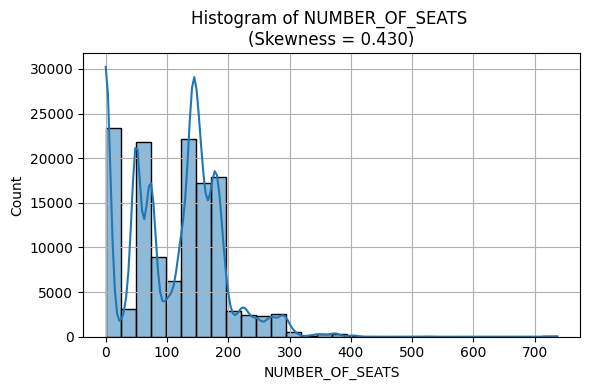

In [67]:
skew = clean_inventory['NUMBER_OF_SEATS'].skew()
print(f"Skewness of {'NUMBER_OF_SEATS'}: {skew:.3f}")

# Plot histogram
plt.figure(figsize=(6, 4))
sns.histplot(clean_inventory['NUMBER_OF_SEATS'], bins=30, kde=True)
plt.title(f'Histogram of NUMBER_OF_SEATS \n(Skewness = {skew:.3f})')
plt.xlabel('NUMBER_OF_SEATS')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Skewness of CAPACITY_IN_POUNDS: 4.083


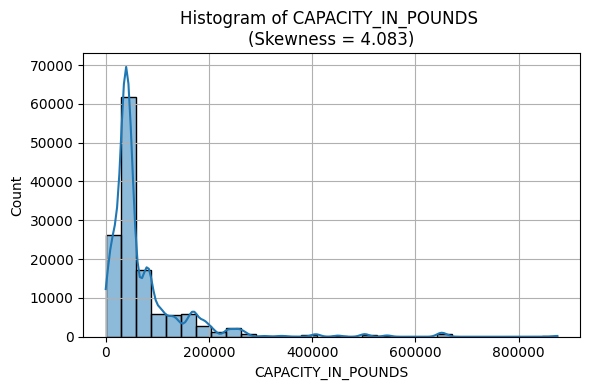

In [68]:
skew = clean_inventory['CAPACITY_IN_POUNDS'].skew()
print(f"Skewness of {'CAPACITY_IN_POUNDS'}: {skew:.3f}")

# Plot histogram
plt.figure(figsize=(6, 4))
sns.histplot(clean_inventory['CAPACITY_IN_POUNDS'], bins=30, kde=True)
plt.title(f'Histogram of CAPACITY_IN_POUNDS \n(Skewness = {skew:.3f})')
plt.xlabel('CAPACITY_IN_POUNDS')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Applying BOXCOX transforamtion to NUMBER_OF_SEATS and CAPACITY_IN_POUNDS

All values must be positive for the boxcox transformation, therefore we must add 1 to all the NUMBER_OF_SEATS rows as cargo planes have 0, but 0 is not posiitive. Once this is done we can subtract 1 again.

In [69]:
clean_inventory.loc[:, 'NUMBER_OF_SEATS'] = clean_inventory['NUMBER_OF_SEATS'] + 1

In [70]:
# Box-Cox transformation with .loc to suppress SettingWithCopyWarning
clean_inventory.loc[:, 'NUMBER_OF_SEATS_BOXCOX'], _ = boxcox(clean_inventory['NUMBER_OF_SEATS'])
clean_inventory.loc[:, 'CAPACITY_IN_POUNDS_BOXCOX'], _ = boxcox(clean_inventory['CAPACITY_IN_POUNDS'])

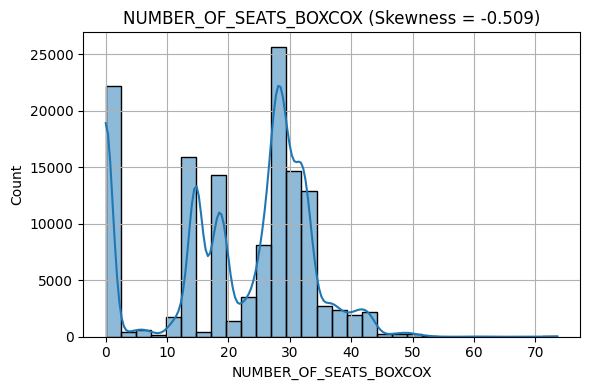

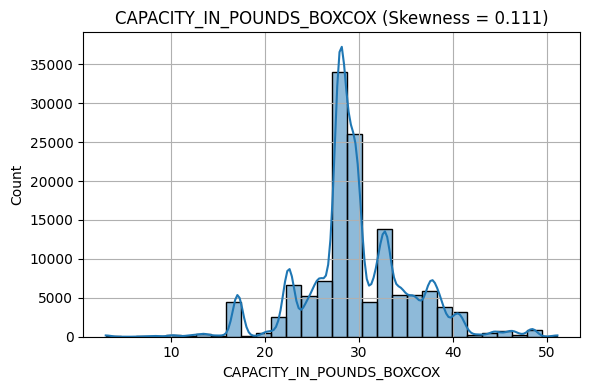

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
clean_inventory.loc[:, 'NUMBER_OF_SEATS'] = clean_inventory['NUMBER_OF_SEATS'] - 1
# List of transformed columns
transformed_cols = ['NUMBER_OF_SEATS_BOXCOX', 'CAPACITY_IN_POUNDS_BOXCOX']

for col in transformed_cols:
    skew_val = clean_inventory[col].skew()
    plt.figure(figsize=(6, 4))
    sns.histplot(clean_inventory[col], bins=30, kde=True)
    plt.title(f'{col} (Skewness = {skew_val:.3f})')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Task 5: Feature engineering

## Creating new size column based on quantiles of NUMBER_OF_SEATS

In [72]:
clean_inventory['SIZE'] = pd.qcut(clean_inventory['NUMBER_OF_SEATS'], q=4, labels=['SMALL', 'MEDIUM', 'LARGE', 'XLARGE'])

In [73]:
clean_inventory['SIZE']

,SIZE
0,SMALL
1,SMALL
2,SMALL
3,SMALL
4,SMALL
...,...
132308,SMALL
132309,SMALL
132310,SMALL
132311,SMALL


## Proportions of aircrafts that are operating versus not per size group

In [74]:
labels=['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']

<ipython-input-75-bba06fa7198d>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['SIZE', 'OPERATING_STATUS'])
<ipython-input-75-bba06fa7198d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('SIZE')['count']


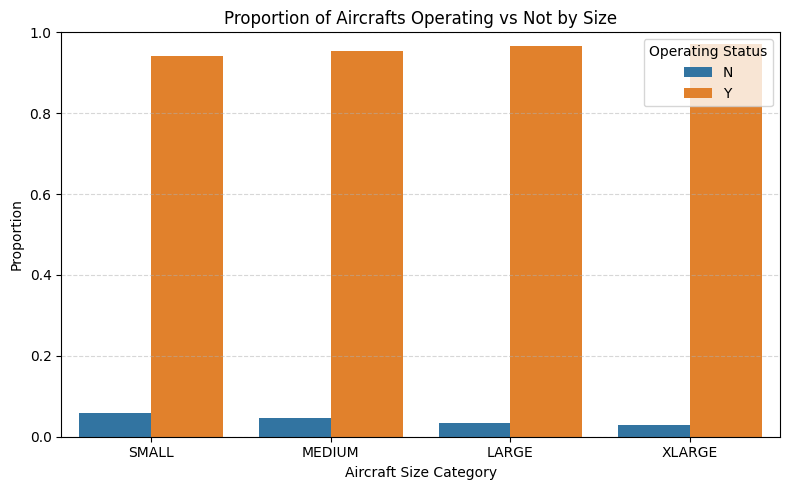

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a proportion table
size_op_status = (
    clean_inventory
    .groupby(['SIZE', 'OPERATING_STATUS'])
    .size()
    .reset_index(name='count')
)

# Step 2: Convert to proportions within each SIZE group
size_op_status['proportion'] = (
    size_op_status
    .groupby('SIZE')['count']
    .transform(lambda x: x / x.sum())
)

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=size_op_status, x='SIZE', y='proportion', hue='OPERATING_STATUS')
plt.title('Proportion of Aircrafts Operating vs Not by Size')
plt.ylabel('Proportion')
plt.xlabel('Aircraft Size Category')
plt.ylim(0, 1)
plt.legend(title='Operating Status')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [76]:
size_op_status

,SIZE,OPERATING_STATUS,count,proportion
0,SMALL,N,2379,0.057845
1,SMALL,Y,38748,0.942155
2,MEDIUM,N,1147,0.045699
3,MEDIUM,Y,23952,0.954301
4,LARGE,N,1180,0.034206
5,LARGE,Y,33317,0.965794
6,XLARGE,N,898,0.028533
7,XLARGE,Y,30574,0.971467


<ipython-input-77-2c767caf411f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['SIZE', 'AIRCRAFT_STATUS'])
<ipython-input-77-2c767caf411f>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('SIZE')['count']


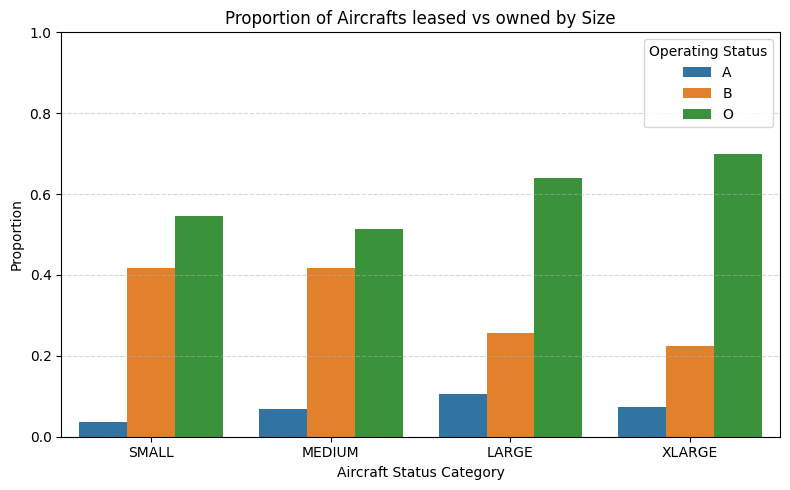

In [77]:


# Step 1: Create a proportion table
size_op_status = (
    clean_inventory
    .groupby(['SIZE', 'AIRCRAFT_STATUS'])
    .size()
    .reset_index(name='count')
)

# Step 2: Convert to proportions within each SIZE group
size_op_status['proportion'] = (
    size_op_status
    .groupby('SIZE')['count']
    .transform(lambda x: x / x.sum())
)

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=size_op_status, x='SIZE', y='proportion', hue='AIRCRAFT_STATUS')
plt.title('Proportion of Aircrafts leased vs owned by Size')
plt.ylabel('Proportion')
plt.xlabel('Aircraft Status Category')
plt.ylim(0, 1)
plt.legend(title='Operating Status')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [78]:
size_op_status

,SIZE,AIRCRAFT_STATUS,count,proportion
0,SMALL,A,1544,0.037542
1,SMALL,B,17130,0.416515
2,SMALL,O,22453,0.545943
3,MEDIUM,A,1730,0.068927
4,MEDIUM,B,10476,0.417387
5,MEDIUM,O,12893,0.513686
6,LARGE,A,3630,0.105227
7,LARGE,B,8807,0.255298
8,LARGE,O,22060,0.639476
9,XLARGE,A,2352,0.074733
